## 线性回归和随机梯度下降
### 作者：杨健
导入数据和库函数

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import  train_test_split
import numpy as np
import matplotlib.pyplot as plt

#loda data from svmlight format file
def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]

X, y = get_data()
X = X.toarray()
X = np.hstack((np.ones((X.shape[0], 1)), X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

通过整个样本计算闭式解（解析解）
$$W^* = (X^T X)^{-1} X^T Y$$

In [2]:
#solve vector W use closed form
def solve_W_closed_form(X, Y):
    Y = np.array(Y)
    W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return W

#calculate loss function
def calc_loss(X, y, W):
    loss = 0.5*(np.linalg.norm(y-X.dot(W))**2)
    return loss

使用Loss函数检测有效性。
分别计算训练集和验证集的$Loss Train$ ，$Loss Val$。

In [3]:
W_train = solve_W_closed_form(X_train, y_train)
print("closed form solution W")
print(W_train)
print("closed form solution loss:")
print("train_loss: ")
print(calc_loss(X_train, y_train, W_train))
print("test_loss: ")
print(calc_loss(X_test, y_test, W_train))

closed form solution W
[ 9.80396002 -5.70842301  1.47758936  0.66643874  1.38675239 -3.94603762
 11.40026702 -0.44899433 -7.70259391  2.96425392 -2.60872035 -4.33867811
  2.6145364  -9.37962624]
closed form solution loss:
train_loss: 
4233.440988955712
test_loss: 
1403.2672187595117


通过对整个数据集求梯度来求解。
梯度定义如下:
$$ \frac{\partial \mathcal{L_D}(W)}{\partial W} = -X^T y + X^T X W$$

In [4]:
#solve W  vector use gradient descent
def solve_W_gradient_descent(X, Y, learning_rate, epoch, X_test, Y_test):
    train_loss = []
    test_loss = []
    Y = Y.reshape(Y.shape[0], 1)
    W = np.random.rand(X.shape[1], 1)
    for i in range(epoch):
        gradient = -X.T.dot(Y) + X.T.dot(X).dot(W)
        #normnazie
        gradient = gradient*(1/X.shape[0])
        W = W - learning_rate*gradient
        epoch_train_loss = calc_loss(X, Y, W)
        epoch_test_loss = calc_loss(X_test, Y_test, W)
        train_loss.append(epoch_train_loss)
        test_loss.append(epoch_test_loss)
    #print(loss)
    return W,train_loss, test_loss


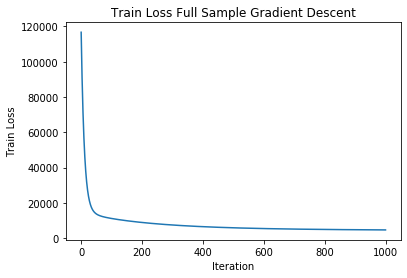

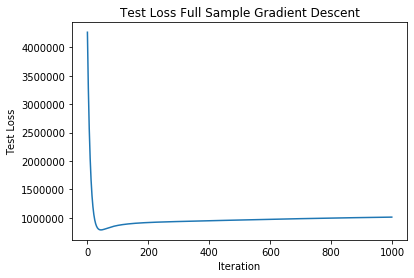

full sample gradient desent W
[ 8.02863015 -6.43994713 -0.78866651 -1.85094279  1.22036141 -2.48234642
  7.77305366  0.27413765 -4.19502419  1.39651361 -0.05759531 -4.37583805
  3.73115048 -9.07375139]
train Loss:
4743.373852125651
test loss:
1661.6489353569405


In [5]:
W_gra, train_loss_gra, test_loss_gra = solve_W_gradient_descent(X_train, y_train, 0.01, 1000, X_test, y_test)
plt.figure()
plt.plot(train_loss_gra)
plt.title("Train Loss Full Sample Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.savefig('lab1_full_sam_train.jpg')
plt.show()
plt.figure()
plt.plot(test_loss_gra)
plt.title("Test Loss Full Sample Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Test Loss")
plt.savefig('lab1_full_sam_test.jpg')
plt.show()
print("full sample gradient desent W")
W_gra = W_gra.reshape((W_gra.shape[0], ))
print(W_gra)
print("train Loss:")
print(calc_loss(X_train, y_train, W_gra))
print("test loss:")
print(calc_loss(X_test, y_test, W_gra))

通过随机梯度下降来求解，梯度定义如下：
$$ \frac{\partial \mathcal{L_D}(W)}{\partial W} = -X^T y + X^T X W$$

In [6]:

def solve_W_stochastic_gradient_descent(X, Y, learning_rate, epoch, batch, X_test, Y_test):
    train_loss = []
    test_loss = []
    Y = Y.reshape(Y.shape[0], 1)
    W = np.random.rand(X.shape[1], 1)
    for i in range(epoch):
        bat = np.random.choice(X.shape[0], batch)
        X_batch = X[bat]
        Y_batch = Y[bat]
        gradient = -X_batch.T.dot(Y_batch) + X_batch.T.dot(X_batch).dot(W)
        gradient = gradient * (1/batch)
        # normnazie
        W = W - learning_rate * gradient
        epoch_train_loss = calc_loss(X, Y, W)
        epoch_test_loss = calc_loss(X_test, Y_test, W)
        train_loss.append(epoch_train_loss)
        test_loss.append(epoch_test_loss)
    #print(loss)
    return W,train_loss, test_loss


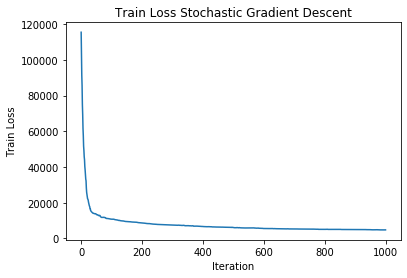

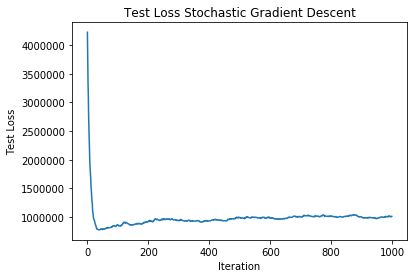

stochastic gradient desent W
[ 8.08268508 -6.30155275 -0.78598886 -1.89187401  0.82443572 -2.01483919
  7.97406285  0.47799078 -4.06687767  1.29600276 -0.21732002 -4.13367828
  3.7523946  -9.43037386]
train Loss:
4786.153605866261
test loss:
1679.1592170902695


In [7]:
W_gra, train_loss_gra, test_loss_gra = solve_W_stochastic_gradient_descent(X_train, y_train, 0.01, 1000, 5, X_test, y_test)
plt.figure()
plt.plot(train_loss_gra)
plt.title("Train Loss Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.savefig('lab1_sto_sam_train.jpg')
plt.show()
plt.figure()
plt.plot(test_loss_gra)
plt.title("Test Loss Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Test Loss")
plt.savefig('lab1_sto_sam_test.jpg')
plt.show()
print("stochastic gradient desent W")
W_gra = W_gra.reshape((W_gra.shape[0], ))
print(W_gra)
print("train Loss:")
print(calc_loss(X_train, y_train, W_gra))
print("test loss:")
print(calc_loss(X_test, y_test, W_gra))